# Classifying Urban sounds using Deep Learning

## 3 Model Training and Evaluation 

### Load Preprocessed data 

In [5]:
# retrieve the preprocessed data from previous notebook

%store -r x_train 
%store -r x_test 
%store -r y_train 
%store -r y_test 
%store -r yy 
%store -r le

### Initial model architecture - MLP

We will start with constructing a Multilayer Perceptron (MLP) Neural Network using Keras and a Tensorflow backend. 

Starting with a `sequential` model so we can build the model layer by layer. 

We will begin with a simple model architecture, consisting of three layers, an input layer, a hidden layer and an output layer. All three layers will be of the `dense` layer type which is a standard layer type that is used in many cases for neural networks. 

The first layer will receive the input shape. As each sample contains 40 MFCCs (or columns) we have a shape of (1x40) this means we will start with an input shape of 40. 

The first two layers will have 256 nodes. The activation function we will be using for our first 2 layers is the `ReLU`, or `Rectified Linear Activation`. This activation function has been proven to work well in neural networks.

We will also apply a `Dropout` value of 50% on our first two layers. This will randomly exclude nodes from each update cycle which in turn results in a network that is capable of better generalisation and is less likely to overfit the training data.

Our output layer will have 10 nodes (num_labels) which matches the number of possible classifications. The activation is for our output layer is `softmax`. Softmax makes the output sum up to 1 so the output can be interpreted as probabilities. The model will then make its prediction based on which option has the highest probability.

In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 

num_labels = yy.shape[1]
filter_size = 2

# Construct model 
model = Sequential()

model.add(Dense(256, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

### Compiling the model 

For compiling our model, we will use the following three parameters: 

* Loss function - we will use `categorical_crossentropy`. This is the most common choice for classification. A lower score indicates that the model is performing better.

* Metrics - we will use the `accuracy` metric which will allow us to view the accuracy score on the validation data when we train the model. 

* Optimizer - here we will use `adam` which is a generally good optimizer for many use cases.


In [3]:
# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam') 

In [4]:
# Display model architecture summary 
model.summary()

# Calculate pre-training accuracy 
score = model.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               10496     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2

### Training 

Here we will train the model. 

We will start with 100 epochs which is the number of times the model will cycle through the data. The model will improve on each cycle until it reaches a certain point. 

We will also start with a low batch size, as having a large batch size can reduce the generalisation ability of the model. 

In [5]:
from keras.callbacks import ModelCheckpoint 
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.basic_mlp.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
204/219 [==========================>...] - ETA: 0s - loss: 9.1964 - accuracy: 0.1886
Epoch 1: val_loss improved from inf to 2.12393, saving model to saved_models\weights.best.basic_mlp.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 8.7617 - accuracy: 0.1911 - val_loss: 2.1239 - val_accuracy: 0.2398
Epoch 2/100
215/219 [============================>.] - ETA: 0s - loss: 2.2519 - accuracy: 0.2523
Epoch 2: val_loss improved from 2.12393 to 2.03426, saving model to saved_models\weights.best.basic_mlp.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 2.2504 - accuracy: 0.2531 - val_loss: 2.0343 - val_accuracy: 0.2885
Epoch 3/100
205/219 [===========================>..] - ETA: 0s - loss: 2.0387 - accuracy: 0.2872
Epoch 3: val_loss improved from 2.03426 to 1.83780, saving model to saved_models\weights.best.basic_mlp.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 2.0348 - accuracy: 0.2879 - val_loss: 1.8378 - val_accuracy: 

219/219 [==============================] - 1s 5ms/step - loss: 0.8550 - accuracy: 0.7044 - val_loss: 0.6706 - val_accuracy: 0.7928
Epoch 26/100
215/219 [============================>.] - ETA: 0s - loss: 0.8692 - accuracy: 0.7073
Epoch 26: val_loss did not improve from 0.65494
219/219 [==============================] - 1s 5ms/step - loss: 0.8659 - accuracy: 0.7084 - val_loss: 0.6635 - val_accuracy: 0.7928
Epoch 27/100
207/219 [===========================>..] - ETA: 0s - loss: 0.8367 - accuracy: 0.7104
Epoch 27: val_loss improved from 0.65494 to 0.64496, saving model to saved_models\weights.best.basic_mlp.hdf5
219/219 [==============================] - 1s 5ms/step - loss: 0.8311 - accuracy: 0.7122 - val_loss: 0.6450 - val_accuracy: 0.7997
Epoch 28/100
218/219 [============================>.] - ETA: 0s - loss: 0.8088 - accuracy: 0.7242
Epoch 28: val_loss improved from 0.64496 to 0.62363, saving model to saved_models\weights.best.basic_mlp.hdf5
219/219 [==============================] - 1s

Epoch 52/100
211/219 [===========================>..] - ETA: 0s - loss: 0.6247 - accuracy: 0.7839
Epoch 52: val_loss improved from 0.49171 to 0.47873, saving model to saved_models\weights.best.basic_mlp.hdf5
219/219 [==============================] - 1s 6ms/step - loss: 0.6245 - accuracy: 0.7832 - val_loss: 0.4787 - val_accuracy: 0.8598
Epoch 53/100
217/219 [============================>.] - ETA: 0s - loss: 0.6232 - accuracy: 0.7925
Epoch 53: val_loss did not improve from 0.47873
219/219 [==============================] - 1s 5ms/step - loss: 0.6226 - accuracy: 0.7927 - val_loss: 0.4814 - val_accuracy: 0.8655
Epoch 54/100
219/219 [==============================] - ETA: 0s - loss: 0.6201 - accuracy: 0.7890
Epoch 54: val_loss did not improve from 0.47873
219/219 [==============================] - 1s 5ms/step - loss: 0.6201 - accuracy: 0.7890 - val_loss: 0.4799 - val_accuracy: 0.8615
Epoch 55/100
215/219 [============================>.] - ETA: 0s - loss: 0.6084 - accuracy: 0.7911
Epoch 55:

219/219 [==============================] - 1s 5ms/step - loss: 0.5376 - accuracy: 0.8205 - val_loss: 0.4707 - val_accuracy: 0.8638
Epoch 81/100
217/219 [============================>.] - ETA: 0s - loss: 0.5501 - accuracy: 0.8174
Epoch 81: val_loss did not improve from 0.44949
219/219 [==============================] - 1s 5ms/step - loss: 0.5515 - accuracy: 0.8166 - val_loss: 0.4620 - val_accuracy: 0.8735
Epoch 82/100
209/219 [===========================>..] - ETA: 0s - loss: 0.5198 - accuracy: 0.8301
Epoch 82: val_loss improved from 0.44949 to 0.44434, saving model to saved_models\weights.best.basic_mlp.hdf5
219/219 [==============================] - 1s 6ms/step - loss: 0.5225 - accuracy: 0.8292 - val_loss: 0.4443 - val_accuracy: 0.8815
Epoch 83/100
212/219 [============================>.] - ETA: 0s - loss: 0.5669 - accuracy: 0.8093
Epoch 83: val_loss did not improve from 0.44434
219/219 [==============================] - 1s 6ms/step - loss: 0.5643 - accuracy: 0.8093 - val_loss: 0.4622

In [6]:
from keras.models import load_model
model = load_model('my_model.h5')

### Test the model 

Here we will review the accuracy of the model on both the training and test data sets. 

In [7]:
# Evaluating the model on the training and testing set
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.9324266314506531
Testing Accuracy:  0.8849456310272217


The initial Training and Testing accuracy scores are quite high. As there is not a great difference between the Training and Test scores (~5%) this suggests that the model has not suffered from overfitting. 

### Predictions  

Here we will build a method which will allow us to test the models predictions on a specified audio .wav file. 

In [8]:
import librosa 
import numpy as np 

def extract_feature(file_name):
   
    try:
        audio_data, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=40)
        mfccsscaled = np.mean(mfccs.T,axis=0)
        
    except Exception as e:
        print("Error encountered while parsing file: ", file)
        return None, None

    return np.array([mfccsscaled])


In [9]:
def print_prediction(file_name):
    prediction_feature = extract_feature(file_name) 

    predicted_vector = model.predict(prediction_feature)
#     predicted_class = le.inverse_transform(predicted_vector) 
#     print("The predicted class is:", predicted_class[0], '\n') 

    predicted_proba_vector = model.predict(prediction_feature) 
    predicted_proba = predicted_proba_vector[0]
    val=format(predicted_proba[8], '.3f')
    res=float(val)
    if(res>0):
        print("Emergency Vehicle")
    else:
        print("Non Emergency Vehicle")
        

In [10]:
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt

### Validation 

#### Test with sample data 

Initial sainity check to verify the predictions using a subsection of the sample audio files we explored in the first notebook. We expect the bulk of these to be classified correctly. 

In [15]:
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt

1/1 [==============================] - 0s 20ms/step
Emergency Vehicle


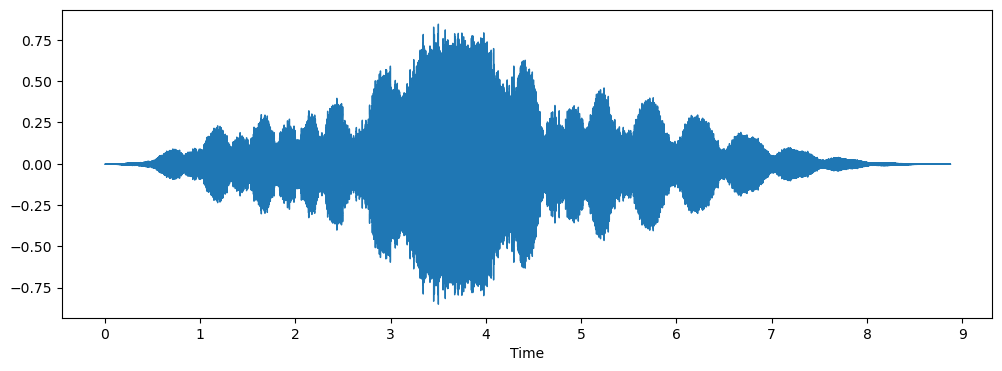

In [18]:
# Class: Air Conditioner

# filename = '../UrbanSound Dataset sample/audio/100852-0-0-0.wav' 
# print_prediction(filename) 


filename = '../Testing/mix.wav' 
plt.figure(figsize=(12,4))
data,sample_rate = librosa.load(filename)
_ = librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)
print_prediction(filename) 



In [ ]:
# Class: Drilling

filename = '../UrbanSound Dataset sample/audio/103199-4-0-0.wav'
print_prediction(filename) 

In [ ]:
# Class: Street music 

filename = '../UrbanSound Dataset sample/audio/101848-9-0-0.wav'
print_prediction(filename) 

In [ ]:
# Class: Car Horn 

filename = '../UrbanSound Dataset sample/audio/100648-1-0-0.wav'
print_prediction(filename) 

#### Observations 

From this brief sanity check the model seems to predict well. One errror was observed whereby a car horn was incorrectly classifed as a dog bark. 

We can see from the per class confidence that this was quite a low score (43%). This allows follows our early observation that a dog bark and car horn are similar in spectral shape. 

### Other audio

Here we will use a sample of various copyright free sounds that we not part of either our test or training data to further validate our model. 

In [ ]:
filename = '../Evaluation audio/dog_bark_1.wav'
print_prediction(filename) 

In [ ]:
filename = '../Evaluation audio/drilling_1.wav'

print_prediction(filename) 

In [ ]:
filename = '../Evaluation audio/gun_shot_1.wav'

print_prediction(filename) 

# sample data weighted towards gun shot - peak in the dog barking sample is simmilar in shape to the gun shot sample

In [ ]:
filename = '../Evaluation audio/siren_1.wav'

print_prediction(filename) 

#### Observations 

The performance of our initial model is satisfactorry and has generalised well, seeming to predict well when tested against new audio data. 

### *In the next notebook we will refine our model*